#Prerequisites:



If you don't know what Objects, Classes, Inheritance or Constructors are please do this first then move on:


# Module:

## Objectives

1. Introduction to Pytorch
2. How to build models in Pytorch
3. How to do Grad Descent with Pytorch
4. Introduce Nodes and Weights


Before we begin please change your runtime type

### Changing Runtime Type

If you look at the image below you will select the arrow pointing down right next to the arrow pointing up near the top right of your screen.

<div>
<img src="
https://drive.google.com/uc?id=1EAMj_OSHcKVnwcuvL3oT1IOTu9UkP5mE" width="500"/>
</div>

You will then select change runtime type and click T4 GPU. This will speed up the downloading and computation process.

GPU's are better for doing matrix multiplication than CPU's so they are better at doing computation. That's the reason we will be using GPU's as our runtime type.

### Importing Dependencies

In [ ]:
%%capture
%pip install numpy scipy pandas scikit-learn matplotlib torch

In [ ]:
import numpy as np
import gdown
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
import torch.nn as nn
from sklearn.metrics import accuracy_score


In [ ]:
!gdown https://drive.google.com/uc?id=1Uozz9Nr-Ajg1Nv9LVueKUZaXhy5S2Ijb

Downloading...
From: https://drive.google.com/uc?id=1Uozz9Nr-Ajg1Nv9LVueKUZaXhy5S2Ijb
To: /content/statics.csv
100% 45.6k/45.6k [00:00<00:00, 56.9MB/s]


In [ ]:
df = pd.read_csv('/content/statics.csv')
df.head()

,Unnamed: 0,labels,force applied,frictional coefficient
0,0,0.0,2.728552,0.778298
1,1,0.0,3.824200,0.892255
2,2,0.0,1.298377,0.245112
3,3,0.0,2.104434,0.207469
4,4,0.0,1.360571,0.094685


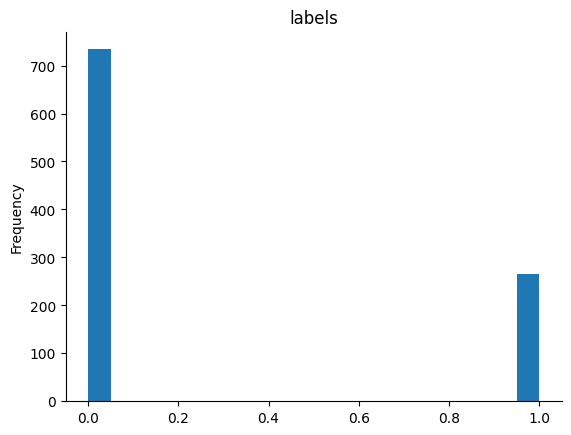

In [ ]:
# @title Label Distribution

from matplotlib import pyplot as plt
df['labels'].plot(kind='hist', bins=20, title='labels')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Brief Refresher Code and Concepts

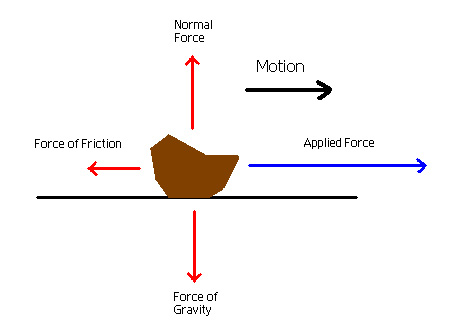

The governing equation here is $$N = mg$$ $$f = μN$$ $$f \leq F$$

where N is normal force, m is mass, g is gravitational constant, $μ$ is frictional coefficient and F is horizontal applied force.

We know that if applied force is greater than frictional force, than the object will move. I will simulate this data below.

I've labeled objects that stayed stationary as 0 and objects that got moved as 1.

In [ ]:
#Extracts labels, forces, and friction applied data and converts into numpy arrays

labels = df['labels'].to_numpy()
forces = df['force applied'].to_numpy()
friction_coeffs = df['frictional coefficient'].to_numpy()

In [ ]:
#Reshapes labels, forces, and friction into (1000,1) instead of (1000,)
labels = labels.reshape((1000,1))
forces = forces.reshape((1000,1))
friction_coeffs = friction_coeffs.reshape((1000,1))

#Creates features numpy array which has dimension (1000,2)
features = np.hstack((forces, friction_coeffs))

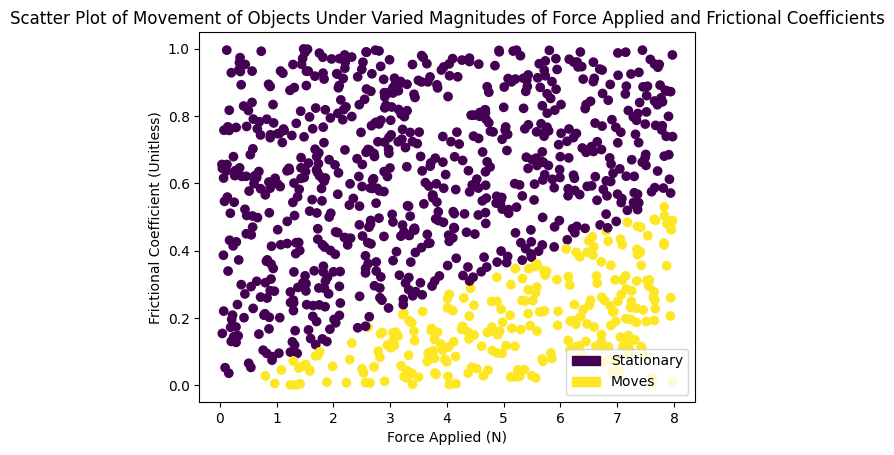

In [ ]:
#Scatter plot of the stationary and moved objects with respect of friciton and
#Force applied .

plt.scatter(forces, friction_coeffs, c = labels)
plt.xlabel("Force Applied (N)")
plt.ylabel("Frictional Coefficient (Unitless)")
plt.title("Scatter Plot of Movement of Objects Under Varied Magnitudes of Force Applied and Frictional Coefficients")
move_patch = mpatches.Patch(color=plt.cm.viridis(1.0), label='Moves')
stationary_patch = mpatches.Patch(color=plt.cm.viridis(0.0), label='Stationary')
plt.legend(handles=[stationary_patch, move_patch])
plt.show()

The ultimate goal is to determine the decision boundary which seperates the stationary objects and the non stationary objects

## Pytorch vs Tensorflow

You might be asking why PyTorch, why not TensorFlow?

<div>
<img src="
https://cdn.prod.website-files.com/67a1e6de2f2eab2e125f8b9a/67be0ec8aef316bdeea12871_percentage_repo_2023.png" width="500"/>
</div>


This is the number of papers that use each framework. In 2018, around 25% of papers used tensorflow, 25% used PyTorch and 50% used some other altnerative. In 2022, around 50% used PyTorch. So the trends indicate that PyTorch will be more beneficial in industry and in research. So we will be using PyTorch. Ultimately the underlying ML Principles regardless of framework.

## Typical PyTorch Practices

I will implement a LinearRegressionModel and explain the process.

**You will then implement a LogisticRegressionModel**

### Torch Tensors

Torch works with torch.tensors. In a similar vain to how numpy works with only np.arrays and not python lists, if you are using the torch library, it only works with torch tensors. (To convert numpy to torch tensors use torch.from_numpy())

In [ ]:
#Use train_test_split to split features and labels into training data
#and testing data. Use a 20% test, 80% train split.

#Convert x_train, x_test, y_train, y_test using torch.from_numpy() function


In [ ]:
#Print out the x_train, x_test, y_train, y_test type here. Use type() function.


<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>


### Step 1: Define Model Architecture

You have to define your model. This is done by creating your own model class that inherits from nn.Module

I will write code for how to create a linear regression model and explain what each piece states

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, input_data):
        return self.linear(input_data)

model = LinearRegressionModel()

<pre> class LinearRegressionModel(nn.Module): </pre>

If you want to create a LinearRegression Model you have to define a LinearRegression Model class. The LinearRegressionModel inherits properties from nn.Module class.


    def __init__(self):
        super().__init__()

This is the constructor. It creates your model object. super() is called since there is a constructor in nn.Module and will initialize all the internal tracking. The gradient tracking, the parameter tracking, the layer tracking.

        self.linear = nn.Linear(2, 1)

This creates a single linear transformation. It basically is a weighted sum. So it multiplies weights to your two input values and adds bias resulting in your output.

$$w_1x_1+w_2x_2+b$$

nn.Linear has three important arguments:

nn.Linear(input_dimension, output_dimension, bias = True)
By default, bias is true. If you don't want to add bias to your output, you can set bias = False.

The following diagram or computation graph or perceptron is to help visualize what is occuring:

<div>
<img src="
https://drive.google.com/uc?id=19PQsx0W1n_CxTAFOoNjoMwfwYXH9OsJj" width="500"/>
</div>


Each edge has a weight associated with it. The output is the weighted sum of the inputs $x_1$, $x_2$. Force Applied and Friction Coefficients are the inputs. There is a small bias term attached to the output node.

    def forward(self, input_data):
        return self.linear(input_data)

This is called the forward pass. It is just passing the input to the output through mathematics we've set up. We can set this up like this since nn.Linear is actually a callable (more or less a function), so self.linear is also a callable.

You will input your training data into forward().

    model = LinearRegressionModel()

Creates an instance of the LinearRegressionModel class

### Step 2: Define Loss and Optimizer Algorithm

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

Defines that the "criterion" or loss is the Mean Squared Error.

The optimization algorithm you picked was the stochastic gradient descent. It's just gradient descent but instead of computing loss for the entire dataset you pick a point at random and compute the loss, then you update the entire weights.

### Step 3: Train Model

You will probably face an error here because the type of Tensor you are working with might not be compatible for calculation. When training your model you must make sure that all Tensors are the same type. Try running the code below, then convert all your x_train, x_test, y_train, and y_test into floats using .float() method.

In [ ]:
for epoch in range(100):
    preds = model(x_train)
    loss = criterion(preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

In [ ]:
#Fix the Tensor Type here (Use .float())


Go back up and run the previous cell


    preds = model(x_train)
    loss = criterion(preds, y_train)

You are basically sending your input data and calculating the loss between the predictions and y training data

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

optimizer.zero_grad sets your gradient back to 0. If you don't clear then the magnitude or direction of the gradient might change.

Example:

Round 1
$$\frac{dL}{dw_1} = 5$$

Round 2
$$\frac{dL}{dw_1} = 5+(-2) = 3$$

which is in the completely wrong direction. It depends on the scenario when to use optimizer.zero_grad.

loss.backward computes the gradients for you.

optimizer.step updates the parameters you had.

### Step 4: Evaluate Model

In [ ]:
predictions = model(x_test)
predictions = predictions.round()

In [ ]:
#This won't work so ignore the error. Explaining what detach() and numpy() are.
print(accuracy_score(predictions.detach().numpy(), y_test.detach().numpy()))

You have to use .detach() because PyTorch internally sets up computation graphs, where everything is connected. So in order to do calculations with Tensor you've put through the model, you have to detach them then do calculations. Numpy() is just for accuracy_score since it

If you ever see NaN, you are kinda screwed but this is expected here cuz linear regression should since it can't handle predicting labels

### Step 5: Graph Decision Boundary

In [ ]:
weights = model.linear.weight.detach().numpy()
bias = model.linear.bias.detach().numpy()

In [ ]:
weights, bias

(array([[nan, nan]], dtype=float32), array([nan], dtype=float32))

If you see nan, of inf values you messed up somewhere and need to troubleshoot

In [ ]:
def plotting(w):
    xmin, xmax = 0, 8
    ymin, ymax = 0, 1

    xd = np.array([xmin, xmax])
    m = -w[0:, 0]/w[0:, 1]
    yd = m*xd
    plt.plot(xd ,yd, 'r', lw = 4, ls = '--')
    plt.scatter(forces, friction_coeffs, c = labels)
    plt.xlabel("Force Applied (N)")
    plt.ylabel("Frictional Coefficient (Unitless)")
    plt.title("Scatter Plot of Movement of Objects Under Varied Magnitudes of Force Applied and Frictional Coefficients")
    move_patch = mpatches.Patch(color=plt.cm.viridis(1.0), label='Moves')
    stationary_patch = mpatches.Patch(color=plt.cm.viridis(0.0), label='Stationary')
    plt.legend(handles=[stationary_patch, move_patch])
    plt.show()
    print(f"""The predicted mass is:{1/m}
The actual mass was 14.7""")

In [ ]:
plotting(weights)

Obviously LinearRegression here won't work. But you will implement LogisticRegression below:

Hint: When you return compute forward you might want to wrap the output in sigmoidal function. You might have to change forward method/function

Hint: The loss function for sigmoidal function is different than the MSELoss

## Your Turn:

### Step 1: Define Model Architecture

In [ ]:
#Define LogisticRegressionModel Class.
class

    #Define Constructor Here:
    def __init__(self):


    #Define forward here:
    def forward(self,
        #You are gonna wrap self.linear(x) with what activation function?


#Instantiate LogisticRegressionModel() and set it to a model variable


### Step 2: Loss and Optimizer

In [ ]:
#criterion shouldn't be MSELoss. What was the loss function for sigmoid?


### Step 3: Train Model

The number of epochs is up to you. Accuracy score should be around 90%

In [ ]:
#The number of epochs you do (i.e.) convergence conditions is up to you.


    #predictions from x_train data


    #Sets optimizer so it won't accumulate gradients


    #Calculate gradient descent

    #Update weights

    #Print loss:


### Step 4: Evaluate Model

In [ ]:
#Evaluate model on test data


In [ ]:
#Print accuracy_score


1.0


### Step 5: Plot Decision Boundary

In [ ]:
#Return weights and biases


In [ ]:
#Use plotting function():


# Exploring Torch Library

Since we remade let's just start printing everything we created to get a better sense of what we just made.

In [ ]:
#Print x_train, x_train.shape,  x_train.dtype, is_leaf, and grad

In [ ]:
print(x_train)
print(x_train.shape)
print(x_train.dtype)
print(x_train.is_leaf)
print(x_train.grad)
print(x_train.device)

tensor([[4.8813, 0.2492],
        [1.2930, 0.0722],
        [0.5875, 0.7905],
        ...,
        [3.6512, 0.0703],
        [1.4829, 0.6171],
        [0.5348, 0.6849]])
torch.Size([800, 2])
torch.float32
True
None
cpu


When you create a neural network, Pytorch automatically creates a computation graph for you and stores information about the each weight and bias. A leaf indicates that you are part of this graph.

That is why you have to use .detach() if

<div>
<img src="https://media5.datahacker.rs/2021/01/54-1.jpg"
     width="500"/>
</div>

Let's print out your model now

In [ ]:
print(model)

LogisticRegressionModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


The class name of the model.

A tree-like listing of all its submodules (layers).

For each submodule: its type (Linear, Conv2d, etc.), input/output sizes if known, kernel sizes, strides, and other parameters.

If the model has nested modules, you see indentation reflecting the hierarchy.

In [ ]:
print(model.state_dict())
print(list(model.parameters()))

OrderedDict({'linear.weight': tensor([[  1.1166, -15.0266]]), 'linear.bias': tensor([-0.5514])})
[Parameter containing:
tensor([[  1.1166, -15.0266]], requires_grad=True), Parameter containing:
tensor([-0.5514], requires_grad=True)]


model.state_dict shows you each weight that the model will learn. So in our case we had two weights in one layer and a bias term in one layer.

model.paramters() is a generator, which creates a Tensor objects. Parameters store the tensor itself.

In [ ]:
print(optimizer)

*   Optimizer name (SGD, Adam, etc.).
*   Parameter groups similar to what we implemented for power law. different hyperparameters for different weights.
*   Hyperparameters for that group: lr, momentum, betas, eps, weight_decay, etc.
*   For multi–param groups, you’d see Parameter Group 1, Parameter Group 2, etc.


In [ ]:
print(loss)